In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("Life_Expectancy_Data.csv")

df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0              263   
1  Afghanistan  2014  Developing              59.9              271   
2  Afghanistan  2013  Developing              59.9              268   
3  Afghanistan  2012  Developing              59.5              272   
4  Afghanistan  2011  Developing              59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624           65      1154  ...   
1             64     0.01               73.523582           62       492  ...   
2             66     0.01               73.219243           64       430  ...   
3             69     0.01               78.184215           67      2787  ...   
4             71     0.01                7.097109           68      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0      6               8.16           65        0.1  584.259210  33736494.0   
1     58               8.18           62        0.1  612.696514    327582.0   
2     62               8.13           64        0.1  631.744976  31731688.0   
3     67               8.52           67        0.1  669.959000   3696958.0   
4     68               7.87           68        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [3]:
# Display datatypes for all column values
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                      int64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                          int64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                                int64
Total expenditure                  float64
Diphtheria                           int64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Total Deaths                         int64
dtype: obje

In [3]:
# Display columns with null values, if any
null_cols = df.columns[df.isnull().any()]
print(df[null_cols].isnull().sum())

Series([], dtype: float64)


In [44]:
# Display columns with '0' as value
zero_columns = df.columns[(df == 0).any()]
for column in zero_columns:
    zero_count = (df[column] == 0).sum()
    print(f"{column}: {zero_count} ")

infant deaths: 395 
percentage expenditure: 5 
Measles : 554 
under-five deaths : 353 
Income composition of resources: 48 


This means there are no null value sin the data but 0 values in the mentioned columns.

- Infant and under-five deaths and Measel cases can be 0 in a country, so that's not an issue
- Even Health Expenditure relative to Country's GDP can be assumed to be 0 for some countries (those countries may not be good to live in though, considering their priorities for their citizens)
- Data is 0 for 'Income composition of resources' in 48 cases. So, we'll let it be 0, as dropping those rows would not be of help. Instead, counting those values as 0 wouldn't copromise our analysis.

In [45]:
# Check for duplicates
duplicates = df.duplicated()

# Display the duplicate rows
if any(duplicates):
    print("Duplicate rows:")
    print(df[duplicates])
else:
    print("No duplicate rows")

No duplicate rows


In [5]:
# Display the stats description
stats = df.describe()
print(stats)

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  1649.000000       1649.000000      1649.000000    1649.000000   
mean   2007.840509         69.302304       168.215282      32.553062   
std       4.087711          8.796834       125.310417     120.847190   
min    2000.000000         44.000000         1.000000       0.000000   
25%    2005.000000         64.400000        77.000000       1.000000   
50%    2008.000000         71.700000       148.000000       3.000000   
75%    2011.000000         75.000000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1600.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   
min       0.010000                0.000000     2.000000

In [3]:
# Converting population values into numeric values ---- not needed coz the values are the same
# df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

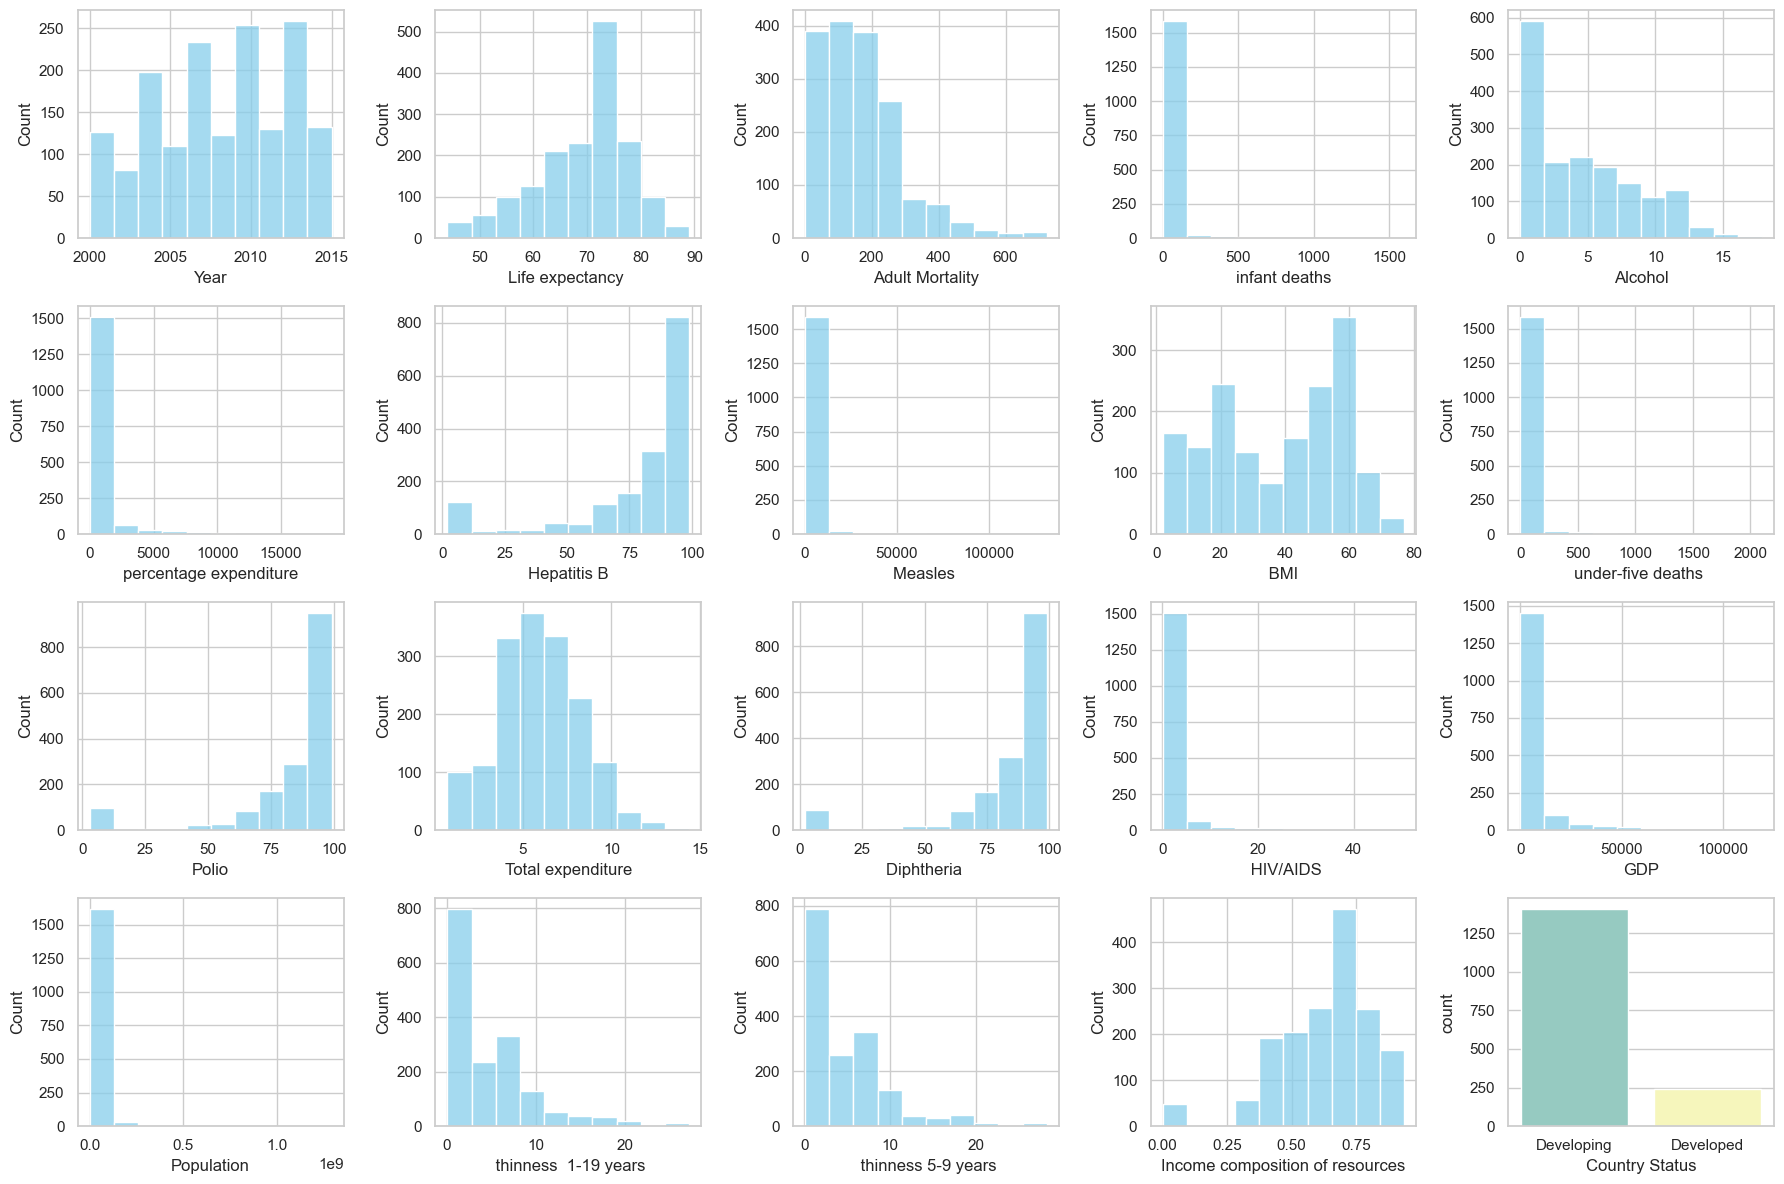

In [4]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(4, 5, figsize=(18, 12))
axes = axes.flatten()

# Plot histograms for numerical columns
for i, column in enumerate(df.select_dtypes(include=['int', 'float']).columns):
    
    #sns.displot(data=df, x=df.index, y=column, ax=axes[i], color='skyblue')
    
    sns.histplot(df[column], bins=10, kde=False, color='skyblue', stat='count', element='bars', ax=axes[i])
    #axes[i].set_title(f'Distribution of {column} ')
    axes[i].set_xlabel(column)
    #axes[i].set_ylabel('Count')
    
# Plot for Status
sns.countplot(x='Status', data=df, palette="Set3", order=df['Status'].value_counts().index, ax=axes[-1])
#axes[-1].set_title('Distribution of Country Status')
axes[-1].set_xlabel('Country Status')
#axes[-1].set_ylabel('Count')


plt.tight_layout() 
    
# Show the plot
plt.show()
    

## How have health indicators changed over the years in a specific region?

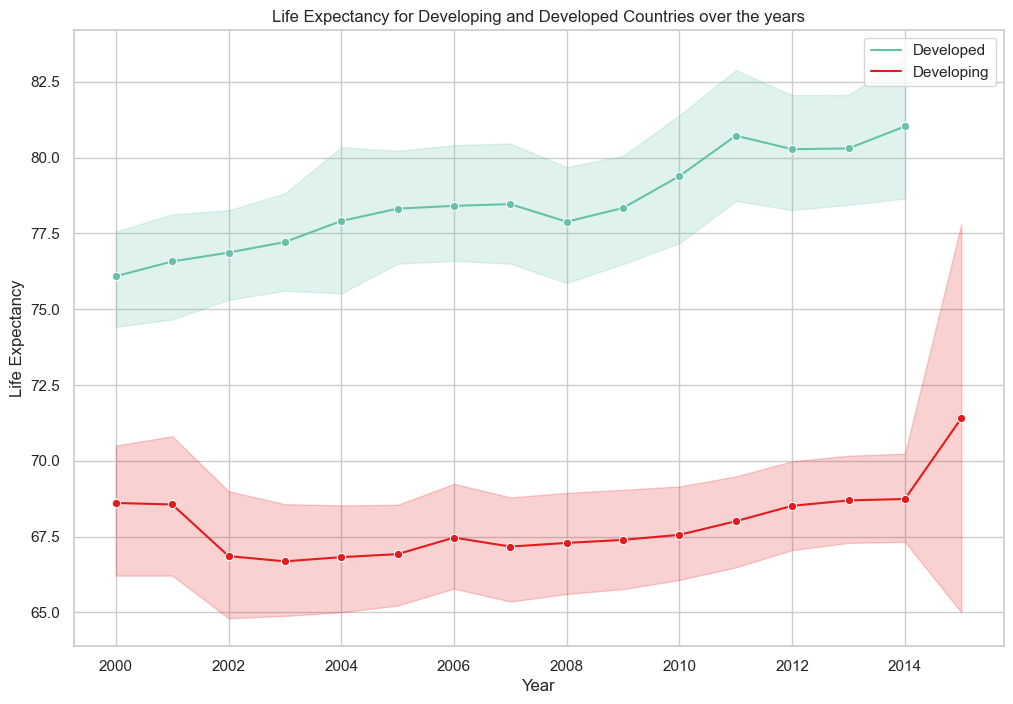

In [47]:
# Compare Life Expectancy in Developing and Developed nations

life_expectancy = ['Life expectancy ']

# Filter the data for 'Developing' and 'Developed' countries
df_developing = df[df['Status'] == 'Developing']
df_developed = df[df['Status'] == 'Developed']

# Melt the DataFrames to make them compatible with Seaborn
df_developing_melted = df_developing.melt(id_vars=['Year', 'Status'], value_vars=life_expectancy, var_name='life_expectancy', value_name='Value')
df_developed_melted = df_developed.melt(id_vars=['Year', 'Status'], value_vars=life_expectancy, var_name='life_expectancy', value_name='Value')

# Plot the data using Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_developed_melted, x='Year', y='Value', hue='Status', marker='o', palette='Set2')
sns.lineplot(data=df_developing_melted, x='Year', y='Value', hue='Status', marker='o', palette='Set1')

plt.title('Life Expectancy for Developing and Developed Countries over the years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

## Is there a correlation between lifestyle factors and health outcomes?

/var/folders/fy/jwk3rs1d08j7mz1f5sk9qv1r0000gn/T/ipykernel_7659/1055573416.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



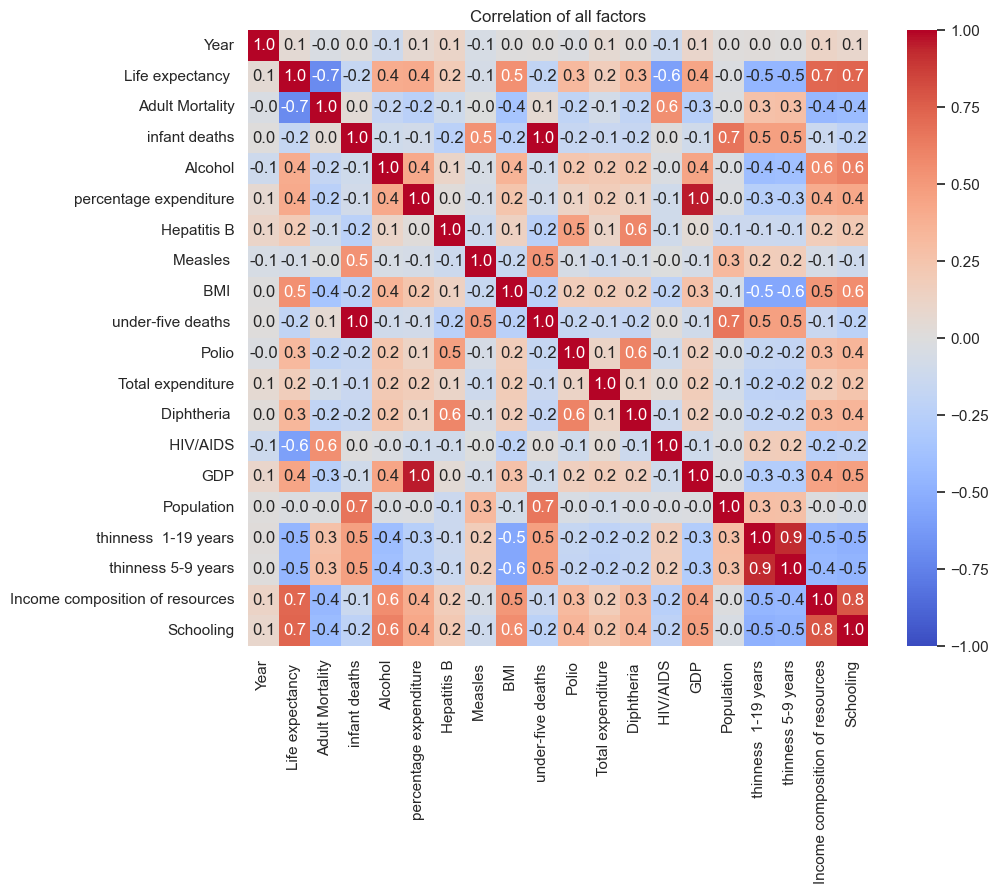

In [48]:
# Correlation of all available factors
corr_matrix = df.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", vmin=-1, vmax=1)
plt.title('Correlation of all factors')
plt.show()

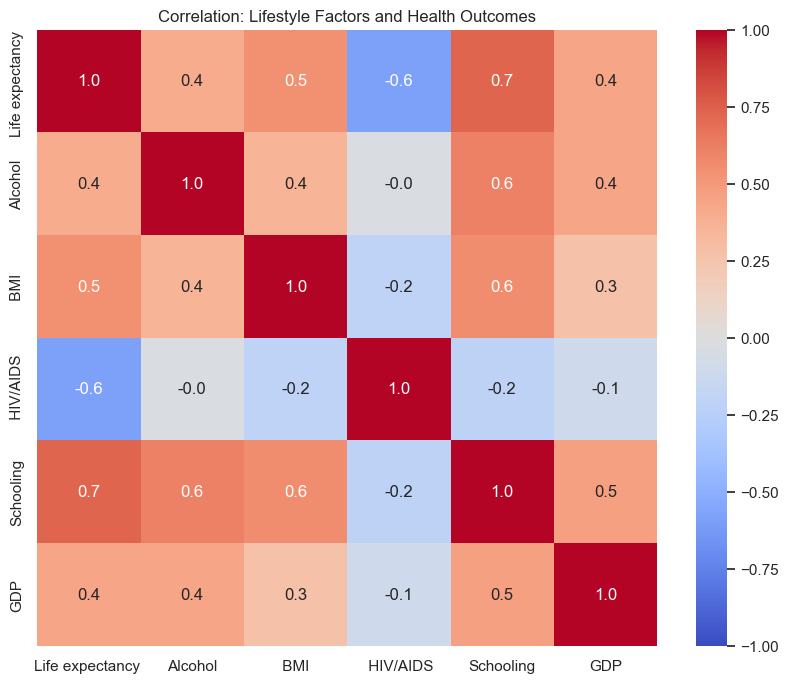

In [49]:
# Correlation of Lifestyle Factors with Health Outcomes and Life Expectancy
corr_columns = ['Life expectancy ', 'Alcohol', ' BMI ', ' HIV/AIDS', 'Schooling', 'GDP']

# Create a correlation matrix
lifehealth_matrix = df[corr_columns].corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(lifehealth_matrix, annot=True, cmap='coolwarm', fmt=".1f", vmin=-1, vmax=1)
plt.title('Correlation: Lifestyle Factors and Health Outcomes')
plt.show()


### Explore the Stacked Area Plot for Health Indicator Trends?

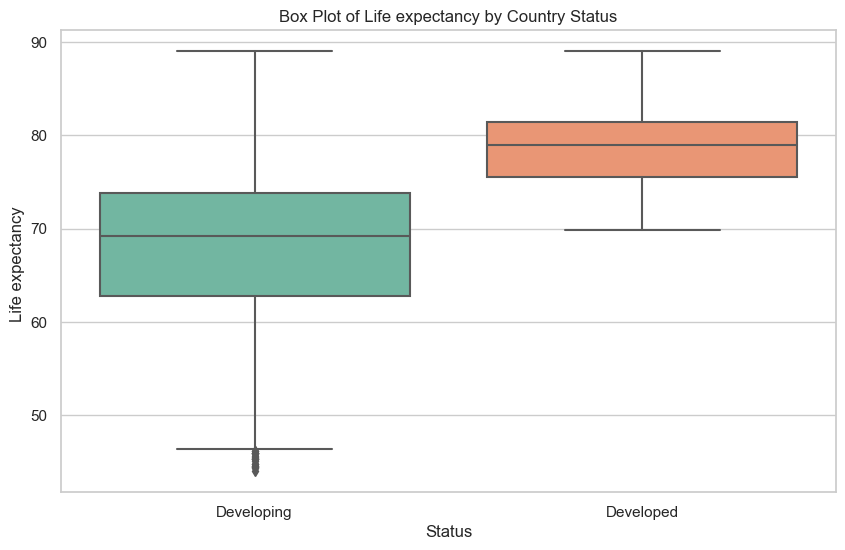

In [50]:
# Choose a health indicator
health_indicator = 'Life expectancy '

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y=health_indicator, data=df, palette='Set2')
plt.title(f'Box Plot of {health_indicator}by Country Status')
#plt.xlabel('Country Status')
plt.ylabel(health_indicator)
plt.show()

In [51]:
# Summary statistics
summary_stats = df.groupby('Status')[health_indicator].describe()

print(summary_stats)


             count       mean       std   min    25%    50%   75%   max
Status                                                                 
Developed    242.0  78.691736  4.273485  69.9  75.55  78.95  81.4  89.0
Developing  1407.0  67.687349  8.353983  44.0  62.80  69.20  73.8  89.0


In [2]:
import plotly.express as px

# Plot Life Expectancy
fig1 = px.scatter_geo(df, locations="Country", locationmode="country names", 
                     color='Life expectancy ', 
                     hover_name="Country", 
                     projection="natural earth", 
                     title="Life Expectancy across the world",
                     color_continuous_scale='tempo',
                     template='plotly')

fig1.show()

# Plot the Health Expenditures
fig2 = px.scatter_geo(df, locations="Country", locationmode="country names", 
                     color='percentage expenditure', 
                     hover_name="Country", 
                     projection="natural earth", 
                     title="Health Expenditure across the world",
                     color_continuous_scale='Burg',
                     template='plotly')

fig2.show()

# Add a new column for the sum of Adult Mortality and under-five deaths
df['Total Deaths'] = df['Adult Mortality'] + df['under-five deaths ']

# Plot the Mortality rates
fig3 = px.scatter_geo(df, locations="Country", locationmode="country names", 
                     color='Total Deaths', 
                     hover_name="Country", 
                     projection="natural earth", 
                     title="Mortality across the world",
                     color_continuous_scale='Sunsetdark',
                     template='plotly')

fig3.show()


/var/folders/fy/jwk3rs1d08j7mz1f5sk9qv1r0000gn/T/ipykernel_7659/2040761623.py:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



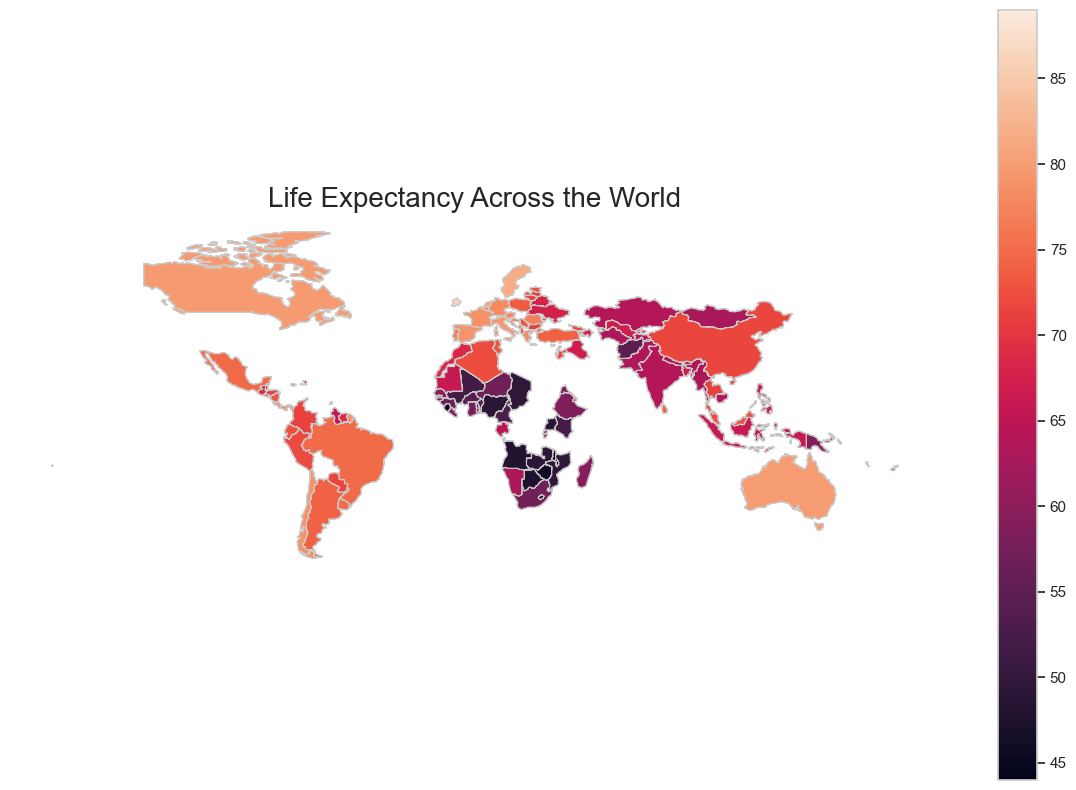

In [62]:
#### DISCARD FOR NOW

import geopandas as gpd

# Load the world map from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming your DataFrame is named df
# Example: df = pd.read_csv('your_dataset.csv')

# Merge world and df based on a common column (e.g., 'Country')
merged_data = world.merge(df, how='left', left_on='name', right_on='Country')

# Plot the world map with life expectancy values
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Life expectancy ', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and customize the plot
plt.title('Life Expectancy Across the World', fontsize=20)
plt.axis('off')

# Show the plot
plt.show()

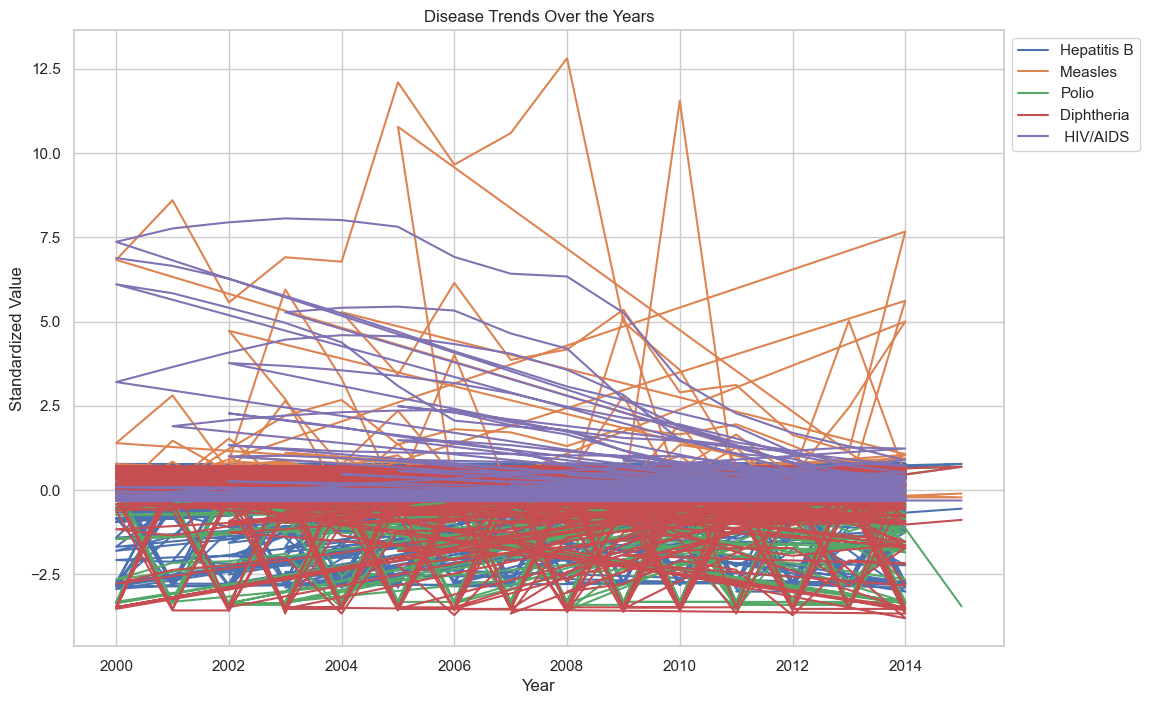

In [53]:
from sklearn.preprocessing import StandardScaler

# Identify disease columns to be taken into account
disease_columns = ['Hepatitis B', 'Measles ', 'Polio', 'Diphtheria ', ' HIV/AIDS']

# a new dataframe with only disease columns
df_disease = df[disease_columns]

# Standardize the data
scaler = StandardScaler()
df_disease_standardized = pd.DataFrame(scaler.fit_transform(df_disease), columns=df_disease.columns)

# Plot line graphs for each standardized column
plt.figure(figsize=(12, 8))
for column in df_disease_standardized.columns:
    plt.plot(df['Year'], df_disease_standardized[column], label=column)

plt.title('Disease Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

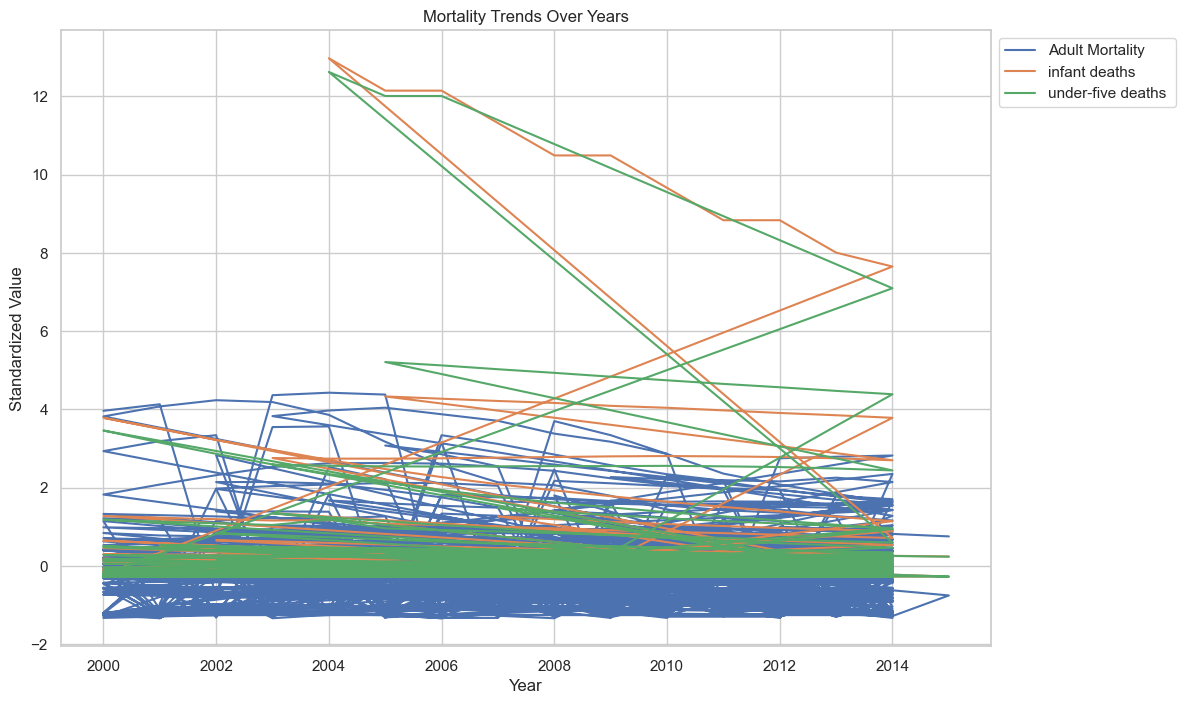

In [54]:
# Identify mortality related columns to be taken into account
mortality_columns = ['Adult Mortality', 'infant deaths', 'under-five deaths ']

# Create a DataFrame with only disease-related columns
df_mortality = df[mortality_columns]

# Standardize the data
scaler = StandardScaler()
df_mortality_standardized = pd.DataFrame(scaler.fit_transform(df_mortality), columns=df_mortality.columns)

# Plot line graphs for each standardized column
plt.figure(figsize=(12, 8))
for column in df_mortality_standardized.columns:
    plt.plot(df['Year'], df_mortality_standardized[column], label=column)

plt.title('Mortality Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

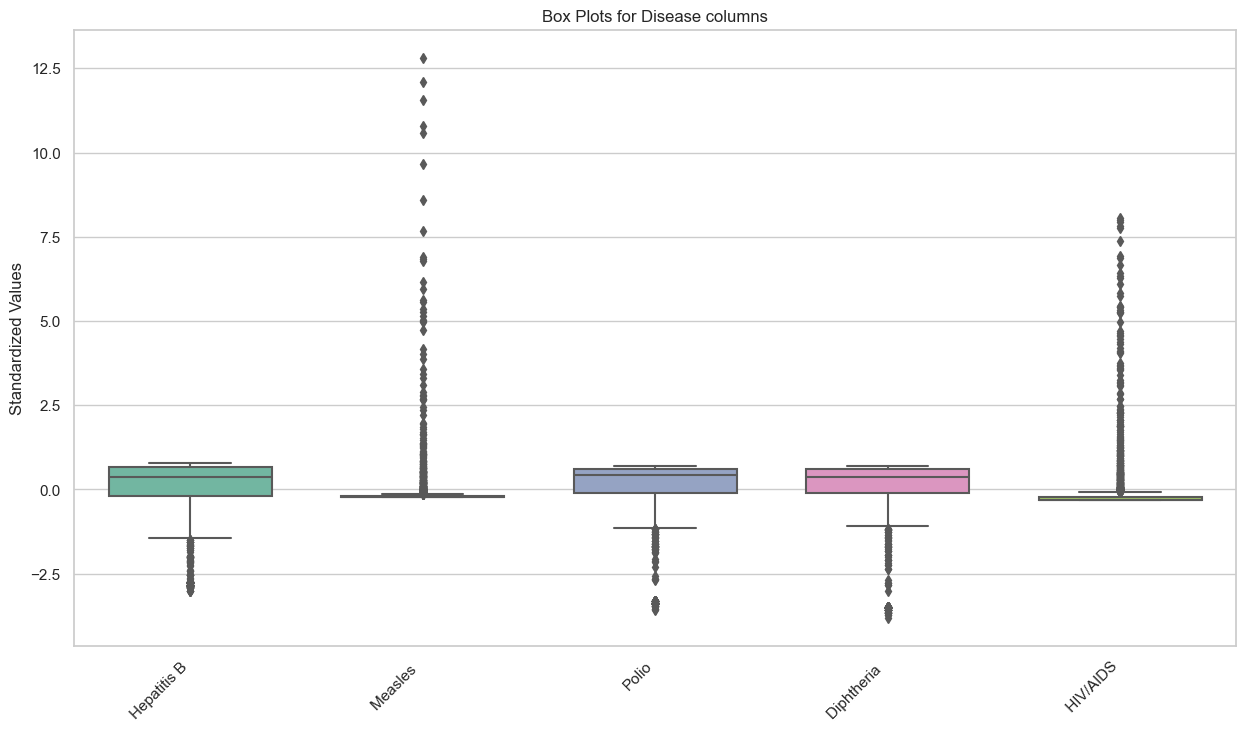

In [55]:
disease_columns = ['Hepatitis B', 'Measles ', 'Polio', 'Diphtheria ', ' HIV/AIDS']

# Create a DataFrame with only disease-related columns
df_disease = df[disease_columns]

# Standardize the values
scaler = StandardScaler()
df_disease_standardized = pd.DataFrame(scaler.fit_transform(df_disease), columns=df_disease.columns)

# Plot box plots for each standardized disease column
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_disease_standardized, width=0.7, palette='Set2')
plt.title('Box Plots for Disease columns')
plt.ylabel('Standardized Values')
plt.xticks(rotation=45, ha='right')
plt.show()

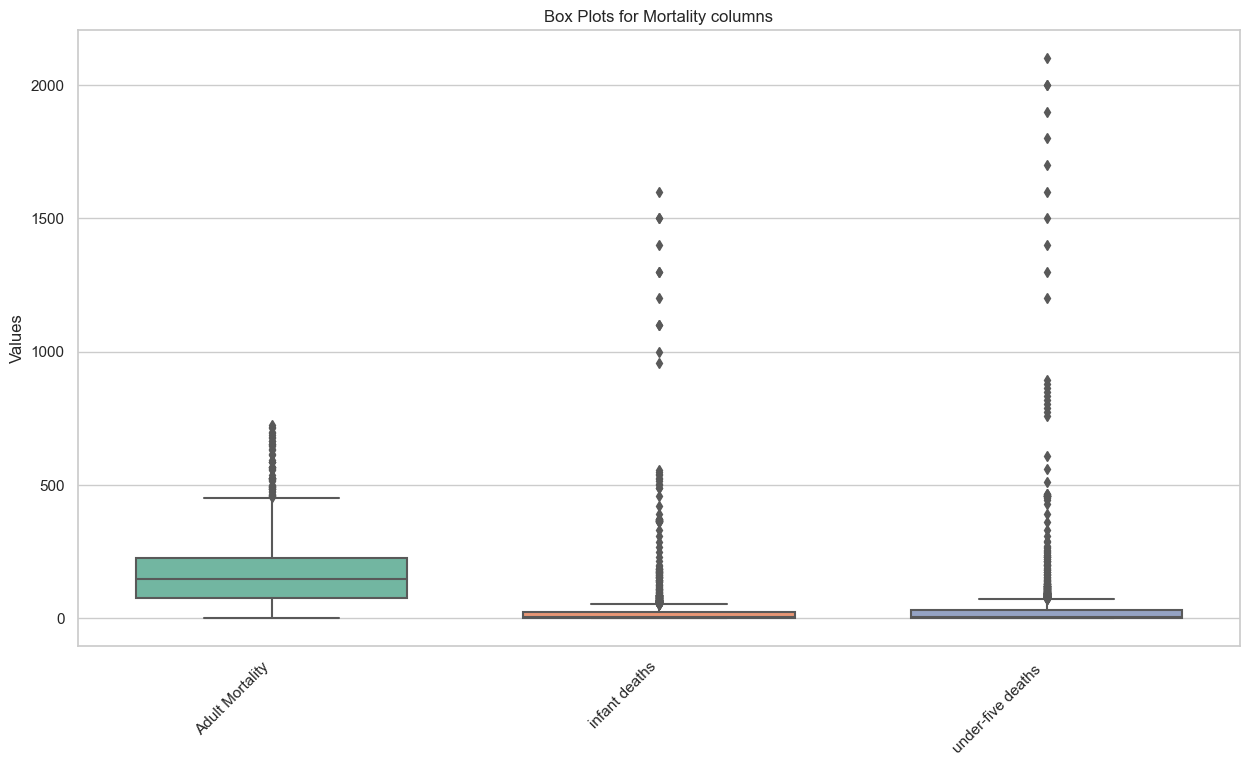

In [56]:
# Identify mortality related columns to be taken into account
mortality_columns = ['Adult Mortality', 'infant deaths', 'under-five deaths ']

# Create a DataFrame with only disease-related columns
df_mortality = df[mortality_columns]

# Standardize the values
# scaler = StandardScaler()
# df_mortality_standardized = pd.DataFrame(scaler.fit_transform(df_mortality), columns=df_mortality.columns)

# Plot box plots for each standardized mortality column
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_mortality, width=0.7, palette='Set2')
plt.title('Box Plots for Mortality columns')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.show()

## K-Means Clustering (Life Expectancy)

/Users/nidhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/fy/jwk3rs1d08j7mz1f5sk9qv1r0000gn/T/ipykernel_10366/1227540466.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



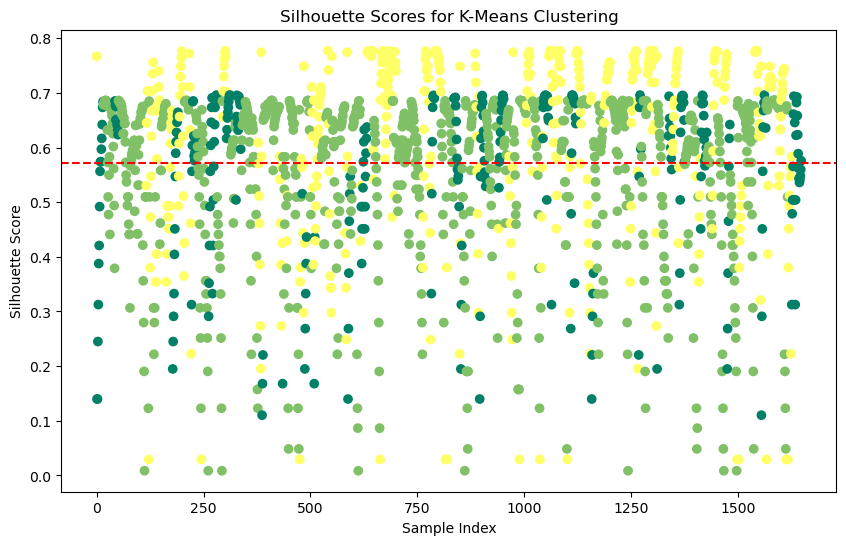

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Select features for clustering (e.g., life expectancy)
features = ['Life expectancy ']

# Create a DataFrame with selected features
df_cluster = df[features]

# Reshape the data to a 2D array
X = df_cluster[features].values.reshape(-1, 1)

# Specify the number of clusters (K)
num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X)

# For calculating Silhouette score later
cluster_labels = df_cluster['Cluster']

# Add cluster labels to the original DataFrame
df['Cluster'] = df_cluster['Cluster'].astype(str)

# Plot scatter plot on a world map using plotly express
fig = px.scatter_geo(df, 
                     locations='Country', 
                     locationmode='country names',
                     color='Cluster',
                     hover_name='Country',
                     #size='Life expectancy ',
                     projection='natural earth',
                     title='K-Means Clustering for Life Expectancy',
                     template='plotly',
                     color_discrete_sequence=px.colors.qualitative.Pastel
                     )
fig.show()


# Calculate silhouette scores for each sample
silhouette_values = silhouette_samples(X, cluster_labels)

# Calculate the overall silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)


# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), silhouette_values, c=cluster_labels, cmap='summer')
plt.axhline(y=silhouette_avg, color="red", linestyle="--")
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Score')
plt.show()

Mean Absolute Error (MAE): 3.981296371439954
Mean Squared Error (MSE): 26.342523823477524
R-squared (R2): 0.6290959966282277


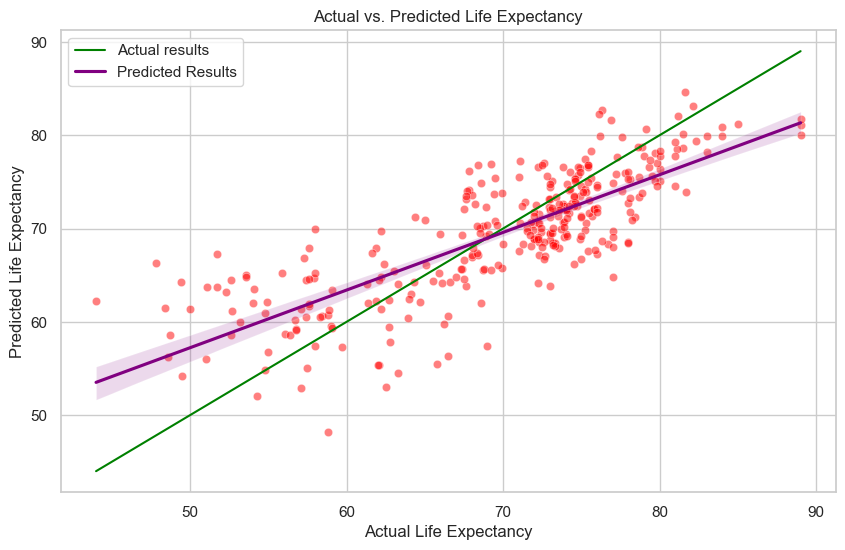

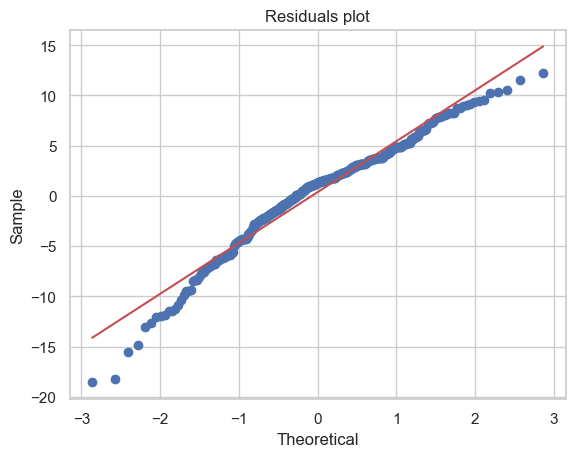

In [8]:
## LINEAR REGRESSION TO ASSESS THE IMPACT OF HEALTH EXPENDITURE AND DISEASES ON LIFE EXPECTANCY

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# Select features and target variable
features = ['Alcohol', 'percentage expenditure', ' BMI ', 'GDP', 'Income composition of resources', 'Schooling']
target = 'Life expectancy '

# Extract features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict life expectancy on the test set
y_pred = model.predict(X_test)

# Evaluate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Calculate residuals
residuals = y_test - y_pred

# Visualize the linear regression model
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted life expectancy
sns.scatterplot(x=y_test, y=y_pred, color='red', alpha=0.5)

# Plot the regression line
sns.lineplot(x=y_test, y=y_test, color='green', label='Actual results')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='purple', label='Predicted Results')

plt.title('Actual vs. Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.show()



# Create a Q-Q plot for residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Residuals plot')
plt.xlabel('Theoretical')
plt.ylabel('Sample')
plt.show()